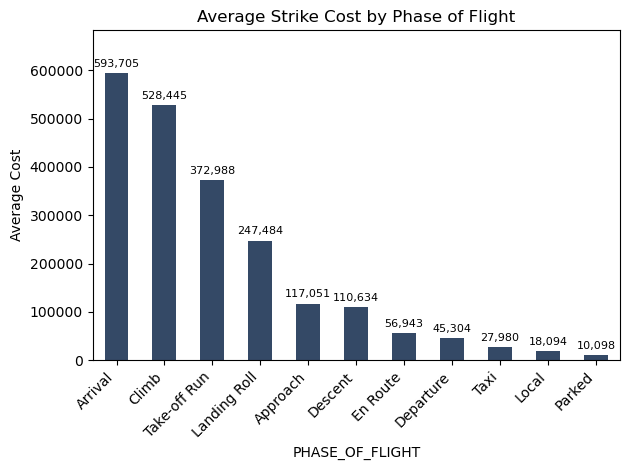

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("phase and cost cleaned.xlsx")
df["TOTAL_COST"] = pd.to_numeric(df["TOTAL_COST"], errors="coerce")

avg = (df.dropna(subset=["TOTAL_COST"])
         .groupby("PHASE_OF_FLIGHT", as_index=False)["TOTAL_COST"]
         .mean()
         .sort_values("TOTAL_COST", ascending=False))

ax = avg.plot(x="PHASE_OF_FLIGHT", y="TOTAL_COST", kind="bar", legend=False, color="#344966")
plt.ylabel("Average Cost")
plt.title("Average Strike Cost by Phase of Flight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(
        c,
        labels=[f"{bar.get_height():,.0f}" for bar in c],
        padding=3,
        fontsize=8,    
    )

ax.set_ylim(0, avg["TOTAL_COST"].max() * 1.15)

plt.tight_layout()
plt.show()